In [1]:
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sb

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


In [6]:
df =pd.read_csv('Users/libbyalthea/school_data/df.csv', sep='\t')
#df = pd.read_csv(os.path.join('..', 'school_data', 'df.csv'))
df.shape

IOError: File Users/libbyalthea/school_data/df.csv does not exist

In [140]:
df.head()

,Unnamed: 0,ClosedDate,CDSCode,StatusType,County,District,School,Zip,Latitude,Longitude,...,Mean,Pop,cds.3,perc_male,perc_wh,perc_as,perc_his,perc_aa,total_enrollment,year.5
0,0,NaN,1100170000000,Active,Alameda,Alameda County Office of Education,NaN,94544-1136,37.658212,-122.09713,...,70489.7361,73026.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,1100170112607,Active,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,94612-3355,37.804520,-122.26815,...,43208.7504,14389.0,1.100170e+12,0.427848,0.027848,0.020253,0.468354,0.412658,395.0,2015.0
2,2,NaN,1100170123968,Active,Alameda,Alameda County Office of Education,Community School for Creative Education,94606-4903,37.784648,-122.23863,...,47992.1271,36672.0,1.100170e+12,0.471204,0.125654,0.078534,0.450262,0.251309,191.0,2015.0
3,3,NaN,1100170124172,Active,Alameda,Alameda County Office of Education,Yu Ming Charter,94608-1265,37.847375,-122.28356,...,63623.8124,28019.0,1.100170e+12,0.509728,0.089494,0.439689,0.046693,0.038911,257.0,2015.0
4,4,NaN,1100170125567,Active,Alameda,Alameda County Office of Education,Urban Montessori Charter,94619-3312,37.778352,-122.18950,...,88014.5843,23299.0,1.100170e+12,0.566308,0.336918,0.075269,0.250896,0.193548,279.0,2015.0


In [141]:
df.Virtual.value_counts()


N    8897
P     884
F      45
Name: Virtual, dtype: int64

This field identifies the type of virtual instruction offered by the school. Virtual instruction is instruction in which students and teachers are separated by time and/or location, and interaction occurs via computers and/or telecommunications technologies. The field is coded as follows:

F = Full Virtual – The school offers only virtual instruction

P = Partial Virtual – The school offers some, but not all, instruction through virtual instruction

N = Not Virtual – The school does not offer any virtual instruction.

Blank = The type of virtual instruction offered by the school is not known, or the record is for a district or county office. Data are only available at the school level, however not all schools in this file are required to provide this information.

In [142]:
df['partial_virtual']=df.Virtual=='P'
df['all_virtual']=df.Virtual=='F'
df['any_virtual']=df.partial_virtual|df.all_virtual
df.any_virtual.value_counts()

False    9974
True      929
Name: any_virtual, dtype: int64

In [143]:
df.drop(['Zip.1','County_Code','School_Code','CDS','year.5','Virtual'],axis=1,inplace=True)
df.drop(['District_Code','year','SchoolCode'],axis=1,inplace=True)
df.drop(['total_years','SchAttend'],axis=1,inplace=True)
df.drop(['grad15','year.4','cds.2','MetAttendTarg'],axis=1,inplace=True)
df.drop(['ClosedDate','StatusType','County','District','School','Zip','ClosedYear','five_zip','sname','cds'],axis=1,inplace=True)
df.drop(['cds.1','year.1','year.2','Cds_Code','year.3','total_grads','uc_grads','male_grads','male_uc_grads','minority_grads','minority_uc_grads','Unnamed: 0'],axis=1,inplace=True)

In [144]:
df.count()

CDSCode                  10903
Latitude                 10903
Longitude                10903
FundingType               1154
type                     10903
charter                   1120
met_all                  10903
crit1                    10903
crit2                    10903
e_enr                    10765
e_tst                    10765
e_prof                   10765
m_enr                    10765
m_tst                    10765
m_prof                   10765
ee_aa                    10765
et_aa                    10765
enp_aa                   10903
me_aa                    10765
mt_aa                    10765
mnp_aa                   10903
ee_wh                    10765
et_wh                    10765
enp_wh                   10903
me_wh                    10765
mt_wh                    10765
mnp_wh                   10903
ee_as                    10765
et_as                    10765
enp_as                   10903
                         ...  
eppm_aa                  10765
mppm_aa 

In [145]:
#ethnicity feature engineering 
ee_wh/e_enr
ee_aa/e_enr
ee_hi/e_hi
ee_as_e_enr
df['perc_staff_masters']=df['num_staff_masters']*1.0/df['num_staff']

NameError: name 'ee_wh' is not defined

In [146]:
df.corr()

,CDSCode,Latitude,Longitude,crit1,crit2,e_enr,e_tst,m_enr,m_tst,ee_aa,...,cds.3,perc_male,perc_wh,perc_as,perc_his,perc_aa,total_enrollment,partial_virtual,all_virtual,any_virtual
CDSCode,1.000000,0.035515,-0.036579,0.022364,0.019665,-0.001008,-0.000799,-0.001042,-0.000753,-0.026385,...,1.000000,0.004887,0.129937,-0.024306,-0.050192,-0.166269,-0.003966,0.011415,0.011685,0.013844
Latitude,0.035515,1.000000,-0.861984,-0.180261,-0.194790,-0.041992,-0.042566,-0.042036,-0.042633,-0.022776,...,0.025585,0.096715,0.347111,0.050202,-0.376396,-0.039718,-0.220495,-0.021068,-0.017671,-0.024656
Longitude,-0.036579,-0.861984,1.000000,0.122646,0.129408,0.033018,0.033624,0.033006,0.033644,0.019760,...,-0.027578,-0.062103,-0.239107,-0.131078,0.323792,0.015152,0.174439,0.040187,0.017965,0.043416
crit1,0.022364,-0.180261,0.122646,1.000000,0.931801,0.312756,0.317877,0.312629,0.318133,0.247041,...,0.028993,-0.236613,-0.244710,0.192568,0.140429,-0.004990,0.348154,-0.146069,-0.087818,-0.162974
crit2,0.019665,-0.194790,0.129408,0.931801,1.000000,0.328003,0.331007,0.327869,0.331102,0.264726,...,0.027720,-0.234908,-0.257821,0.190975,0.142552,0.029130,0.432273,-0.107743,-0.042981,-0.115208
e_enr,-0.001008,-0.041992,0.033018,0.312756,0.328003,1.000000,0.999916,0.999997,0.999904,0.914377,...,0.007144,-0.004211,-0.025276,0.040650,0.000325,0.015003,0.074461,-0.029199,-0.007708,-0.030319
e_tst,-0.000799,-0.042566,0.033624,0.317877,0.331007,0.999916,1.000000,0.999909,0.999992,0.913323,...,0.007293,-0.004988,-0.026633,0.041437,0.001765,0.013500,0.071570,-0.030333,-0.008484,-0.031607
m_enr,-0.001042,-0.042036,0.033006,0.312629,0.327869,0.999997,0.999909,1.000000,0.999902,0.914304,...,0.007090,-0.004240,-0.025575,0.041043,0.000442,0.014928,0.074324,-0.029226,-0.007717,-0.030348
m_tst,-0.000753,-0.042633,0.033644,0.318133,0.331102,0.999904,0.999992,0.999902,1.000000,0.913215,...,0.007420,-0.005077,-0.027040,0.042040,0.001955,0.013304,0.071154,-0.030461,-0.008515,-0.031739
ee_aa,-0.026385,-0.022776,0.019760,0.247041,0.264726,0.914377,0.913323,0.914304,0.913215,1.000000,...,-0.029690,0.006464,-0.055342,0.008443,-0.024821,0.190434,0.021970,-0.016897,-0.001030,-0.016755


In [147]:
#create features by making percents out of totals

# teacher training
df['perc_staff_masters']=df['num_staff_masters']*1.0/df['num_staff']

#teachers per student
df['student_teacher']=df['Cumulative_Enrollment']*1.0/df['num_staff']

df=df.rename(columns = {'Median':'median_income'})



In [148]:
#df=df[['CDSCode','m_pprof','e_pprof','perc_crit','met_all','perc_staff_masters','Truancy_Rate','perc_eligible_free','perc_eligible_FRPM','median_income','student_teacher']]


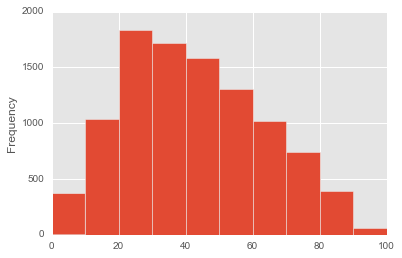

In [149]:
df.met_all.value_counts()
df=df.dropna(subset=['m_pprof'])
df=df[df.m_pprof!='--']
df.m_pprof=df.m_pprof.astype(float)
df=df[df.e_pprof!='--']
df.e_pprof=df.e_pprof.astype(float)

#Percent English Proficient
df.e_pprof.plot(kind='hist')

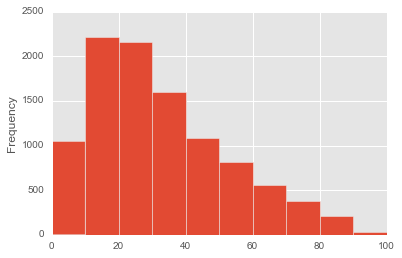

In [150]:
# PERCENT MATH PROFICIENT
df.m_pprof.plot(kind='hist')


In [151]:
df[['CDSCode','m_pprof','e_pprof','perc_crit','met_all','perc_staff_masters','Truancy_Rate','perc_eligible_free','perc_eligible_FRPM','median_income','student_teacher']].corr()

,CDSCode,m_pprof,e_pprof,perc_crit,perc_staff_masters,Truancy_Rate,perc_eligible_free,perc_eligible_FRPM,median_income,student_teacher
CDSCode,1.000000,0.033490,0.039679,0.010434,0.133133,-0.043782,-0.090405,-0.076244,0.075763,-0.009872
m_pprof,0.033490,1.000000,0.873078,0.195376,0.095218,-0.318222,-0.754749,-0.752902,0.617998,-0.087289
e_pprof,0.039679,0.873078,1.000000,0.111104,0.120866,-0.261639,-0.777894,-0.763037,0.583926,-0.067357
perc_crit,0.010434,0.195376,0.111104,1.000000,-0.021854,-0.035983,0.005935,0.020552,0.003763,-0.064686
perc_staff_masters,0.133133,0.095218,0.120866,-0.021854,1.000000,-0.040633,-0.110477,-0.091877,0.116581,0.074095
Truancy_Rate,-0.043782,-0.318222,-0.261639,-0.035983,-0.040633,1.000000,0.285601,0.280172,-0.177320,-0.016328
perc_eligible_free,-0.090405,-0.754749,-0.777894,0.005935,-0.110477,0.285601,1.000000,0.983127,-0.686047,0.087577
perc_eligible_FRPM,-0.076244,-0.752902,-0.763037,0.020552,-0.091877,0.280172,0.983127,1.000000,-0.693976,0.088378
median_income,0.075763,0.617998,0.583926,0.003763,0.116581,-0.177320,-0.686047,-0.693976,1.000000,-0.078450
student_teacher,-0.009872,-0.087289,-0.067357,-0.064686,0.074095,-0.016328,0.087577,0.088378,-0.078450,1.000000


Enrollment Size

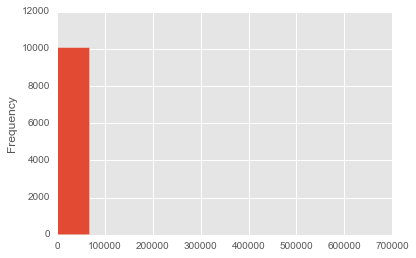

In [152]:
df.Cumulative_Enrollment.plot(kind='hist')

In [153]:
#look at unreasonable outliers
df[df.Cumulative_Enrollment>100000]

,CDSCode,Latitude,Longitude,FundingType,type,charter,met_all,crit1,crit2,e_enr,...,perc_wh,perc_as,perc_his,perc_aa,total_enrollment,partial_virtual,all_virtual,any_virtual,perc_staff_masters,student_teacher
2702,19647330000000,34.056109,-118.25698,NaN,1,NaN,Yes,26,26,282893.0,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
7647,37683380000000,32.754989,-117.14672,NaN,1,NaN,Yes,26,26,55544.0,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN


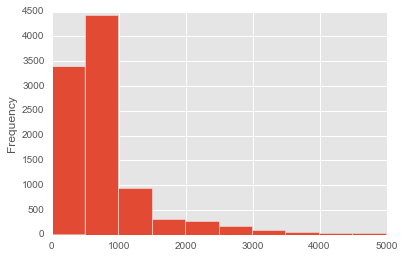

In [154]:
#look at unreasonable outliers
df[df.Cumulative_Enrollment<5000].Cumulative_Enrollment.plot(kind='hist')

In [155]:
df.type.value_counts()

E    5845
H    1852
M    1349
2     525
1     428
3      63
4      14
Name: type, dtype: int64

In [156]:
df.met_all.value_counts()

Yes    8965
No     1111
Name: met_all, dtype: int64

In [157]:
def yestrue(x):
    if x=='Yes':
        return True
    if x=='No':
        return False

In [158]:
#df['met_all']=df[df.met_all=='Yes']
df['success']=df.met_all.apply(yestrue)

In [159]:
df.success.value_counts()

True     8965
False    1111
Name: success, dtype: int64

In [160]:
math_avg=df.m_pprof.mean()
english_avg=df.e_pprof.mean()
print math_avg
print english_avg

32.1898570861
42.3844283446


In [161]:
df['math_above_avg']=df.m_pprof>math_avg
df['english_above_avg']=df.e_pprof>english_avg
df['above_avg']=df.math_above_avg & df.english_above_avg

In [162]:
df.head()

,CDSCode,Latitude,Longitude,FundingType,type,charter,met_all,crit1,crit2,e_enr,...,total_enrollment,partial_virtual,all_virtual,any_virtual,perc_staff_masters,student_teacher,success,math_above_avg,english_above_avg,above_avg
0,1100170000000,37.658212,-122.09713,NaN,1,NaN,No,1,9,190.0,...,NaN,False,False,False,NaN,NaN,False,False,False,False
1,1100170112607,37.804520,-122.26815,Directly funded,H,D,Yes,3,3,90.0,...,395.0,False,False,False,NaN,NaN,True,False,False,False
2,1100170123968,37.784648,-122.23863,Directly funded,E,D,No,2,3,92.0,...,191.0,False,False,False,NaN,NaN,False,False,False,False
3,1100170124172,37.847375,-122.28356,Directly funded,E,D,Yes,3,3,98.0,...,257.0,False,False,False,NaN,NaN,True,True,True,True
4,1100170125567,37.778352,-122.18950,Directly funded,E,D,Yes,3,3,81.0,...,279.0,False,False,False,NaN,NaN,True,False,True,False


In [174]:
df[['perc_crit','perc_staff_masters','student_teacher','avg_years_teaching','total_enrollment','Truancy_Rate','median_income','any_virtual','perc_wh','perc_aa','perc_his','perc_as','success','m_pprof','e_pprof','above_avg']].corr()

,perc_crit,perc_staff_masters,student_teacher,avg_years_teaching,total_enrollment,Truancy_Rate,median_income,any_virtual,perc_wh,perc_aa,perc_his,perc_as,success,m_pprof,e_pprof,above_avg
perc_crit,1.000000,-0.021854,-0.064686,-0.007352,-0.036892,-0.035983,0.003763,-0.203797,-0.042569,-0.077624,0.034861,0.064183,0.810004,0.195376,0.111104,0.095556
perc_staff_masters,-0.021854,1.000000,0.074095,0.017142,0.086860,-0.040633,0.116581,0.026644,0.023478,-0.004387,-0.039557,0.017766,-0.012122,0.095218,0.120866,0.114332
student_teacher,-0.064686,0.074095,1.000000,0.087244,0.222172,-0.016328,-0.078450,-0.003684,-0.180491,0.122050,0.137787,0.019002,-0.040453,-0.087289,-0.067357,-0.054318
avg_years_teaching,-0.007352,0.017142,0.087244,1.000000,-0.008044,-0.039101,0.015279,-0.024388,0.047719,-0.007187,-0.022253,-0.005849,0.006476,0.074889,0.050900,0.077724
total_enrollment,-0.036892,0.086860,0.222172,-0.008044,1.000000,0.145279,0.117903,0.144249,-0.091744,-0.016032,0.035114,0.130386,-0.103784,0.093490,0.258320,0.093221
Truancy_Rate,-0.035983,-0.040633,-0.016328,-0.039101,0.145279,1.000000,-0.177320,0.023124,-0.205524,0.222059,0.185815,-0.163166,-0.066410,-0.318222,-0.261639,-0.280787
median_income,0.003763,0.116581,-0.078450,0.015279,0.117903,-0.177320,1.000000,0.003370,0.372249,-0.125882,-0.508957,0.386557,-0.006930,0.617998,0.583926,0.528091
any_virtual,-0.203797,0.026644,-0.003684,-0.024388,0.144249,0.023124,0.003370,1.000000,0.047646,0.038795,-0.026551,-0.043478,-0.175381,-0.096337,0.032320,-0.047015
perc_wh,-0.042569,0.023478,-0.180491,0.047719,-0.091744,-0.205524,0.372249,0.047646,1.000000,-0.255795,-0.777080,-0.062842,-0.045516,0.466033,0.492442,0.465023
perc_aa,-0.077624,-0.004387,0.122050,-0.007187,-0.016032,0.222059,-0.125882,0.038795,-0.255795,1.000000,-0.102019,-0.067727,-0.086992,-0.229548,-0.223107,-0.174807


In [ ]:
df[df.Cumulative_Enrollment<6000].plot(kind='scatter',x='total_enrollment', y='perc_crit', s=100,figsize=(8,8))

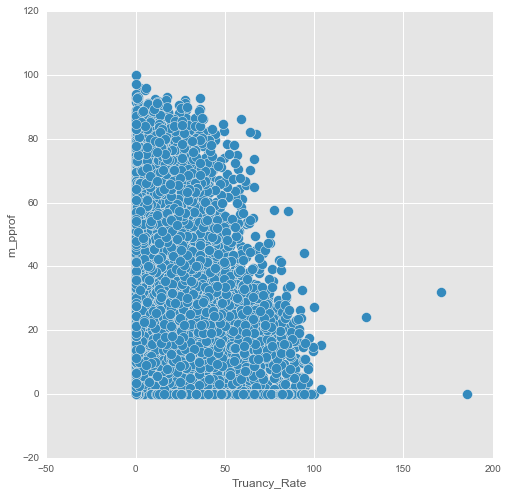

In [180]:
df[df.Cumulative_Enrollment<6000].plot(kind='scatter',x='Truancy_Rate', y='m_pprof', s=100,figsize=(8,8))

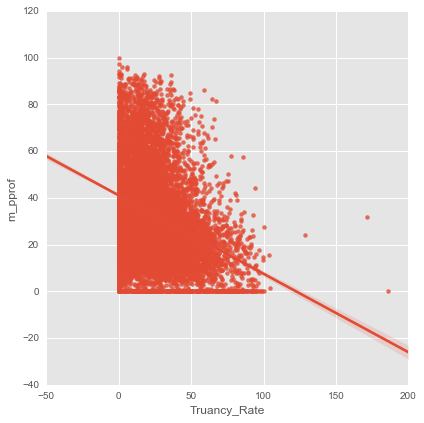

In [192]:
sb.lmplot('Truancy_Rate','m_pprof',df,size=6)

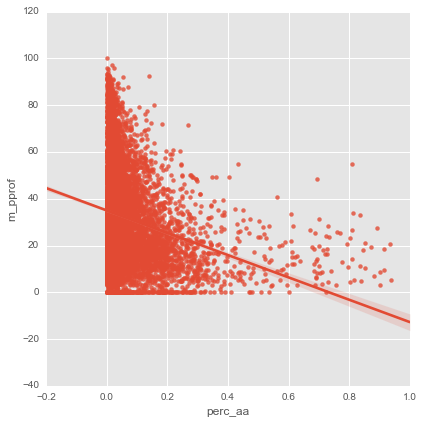

In [190]:
#african american vs. math proficiency
sb.lmplot('perc_aa','m_pprof',df,size=6)

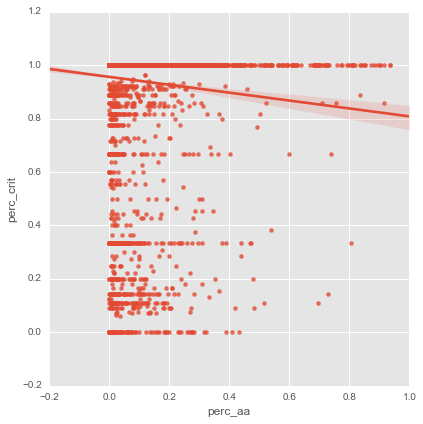

In [193]:
#african american vs. %school criteria met
sb.lmplot('perc_aa','perc_crit',df,size=6)

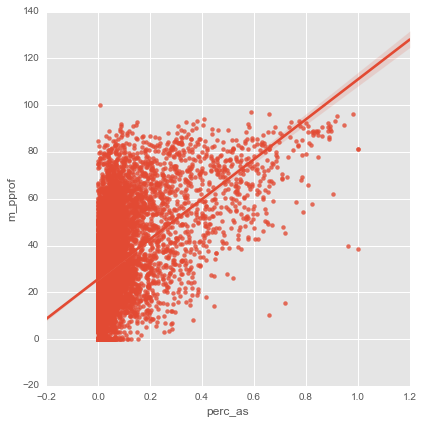

In [194]:
#asian vs. math proficiency 
sb.lmplot('perc_as','m_pprof',df,size=6)

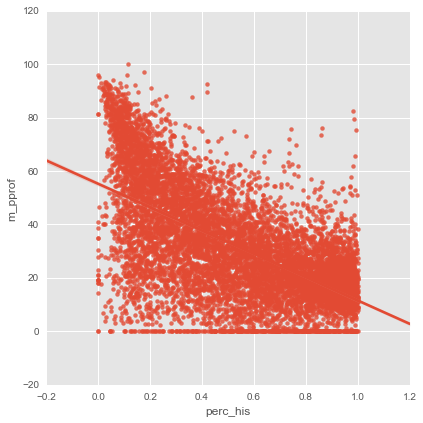

In [195]:
#hispanic vs. math proficiency 
sb.lmplot('perc_his','m_pprof',df,size=6)

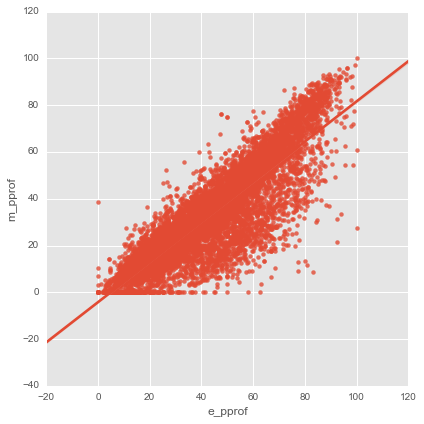

In [197]:
#english vs. math proficiency 
sb.lmplot('e_pprof','m_pprof',df,size=6)

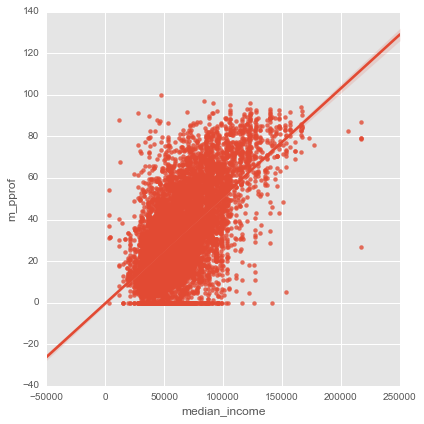

In [198]:
#income vs. math proficiency 
sb.lmplot('median_income','m_pprof',df,size=6)

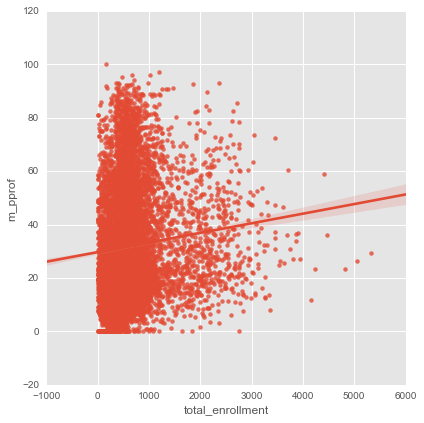

In [199]:
#school size vs. math proficiency 
sb.lmplot('total_enrollment','m_pprof',df,size=6)

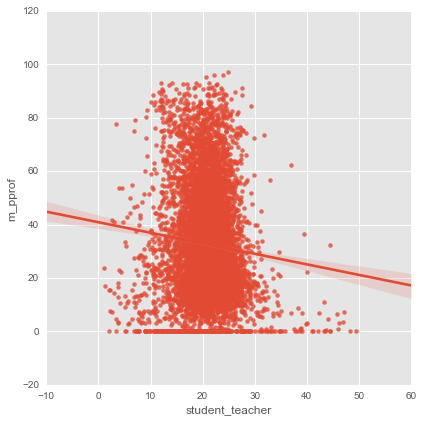

In [201]:
#student to teacher ratio vs. math proficiency 
sb.lmplot('student_teacher','m_pprof',df[df.student_teacher<50],size=6)

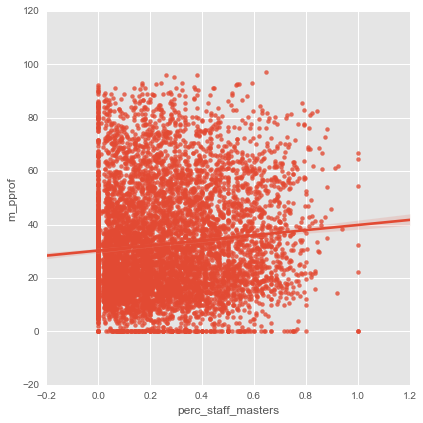

In [203]:
# perc teachers with masters vs. math proficiency 
sb.lmplot('perc_staff_masters','m_pprof',df,size=6)

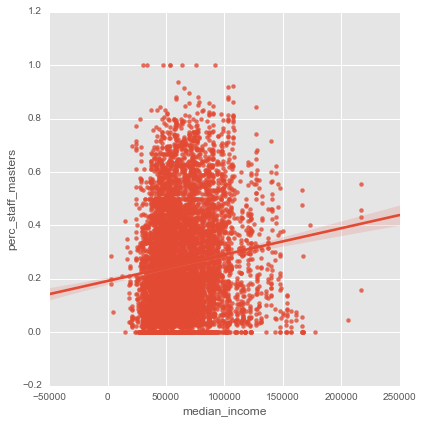

In [205]:
# income vs. perc teachers with masters
sb.lmplot('median_income','perc_staff_masters',df,size=6)

In [165]:
import scale from sklearn

SyntaxError: invalid syntax (<ipython-input-165-93952c313303>, line 1)